# Creating an Interpolated Structured Data Grid

This script allows you to input an unstructured dataset, e.g. from a CFD velocity data file and interpolate it into a structured grid of your chosen size. 

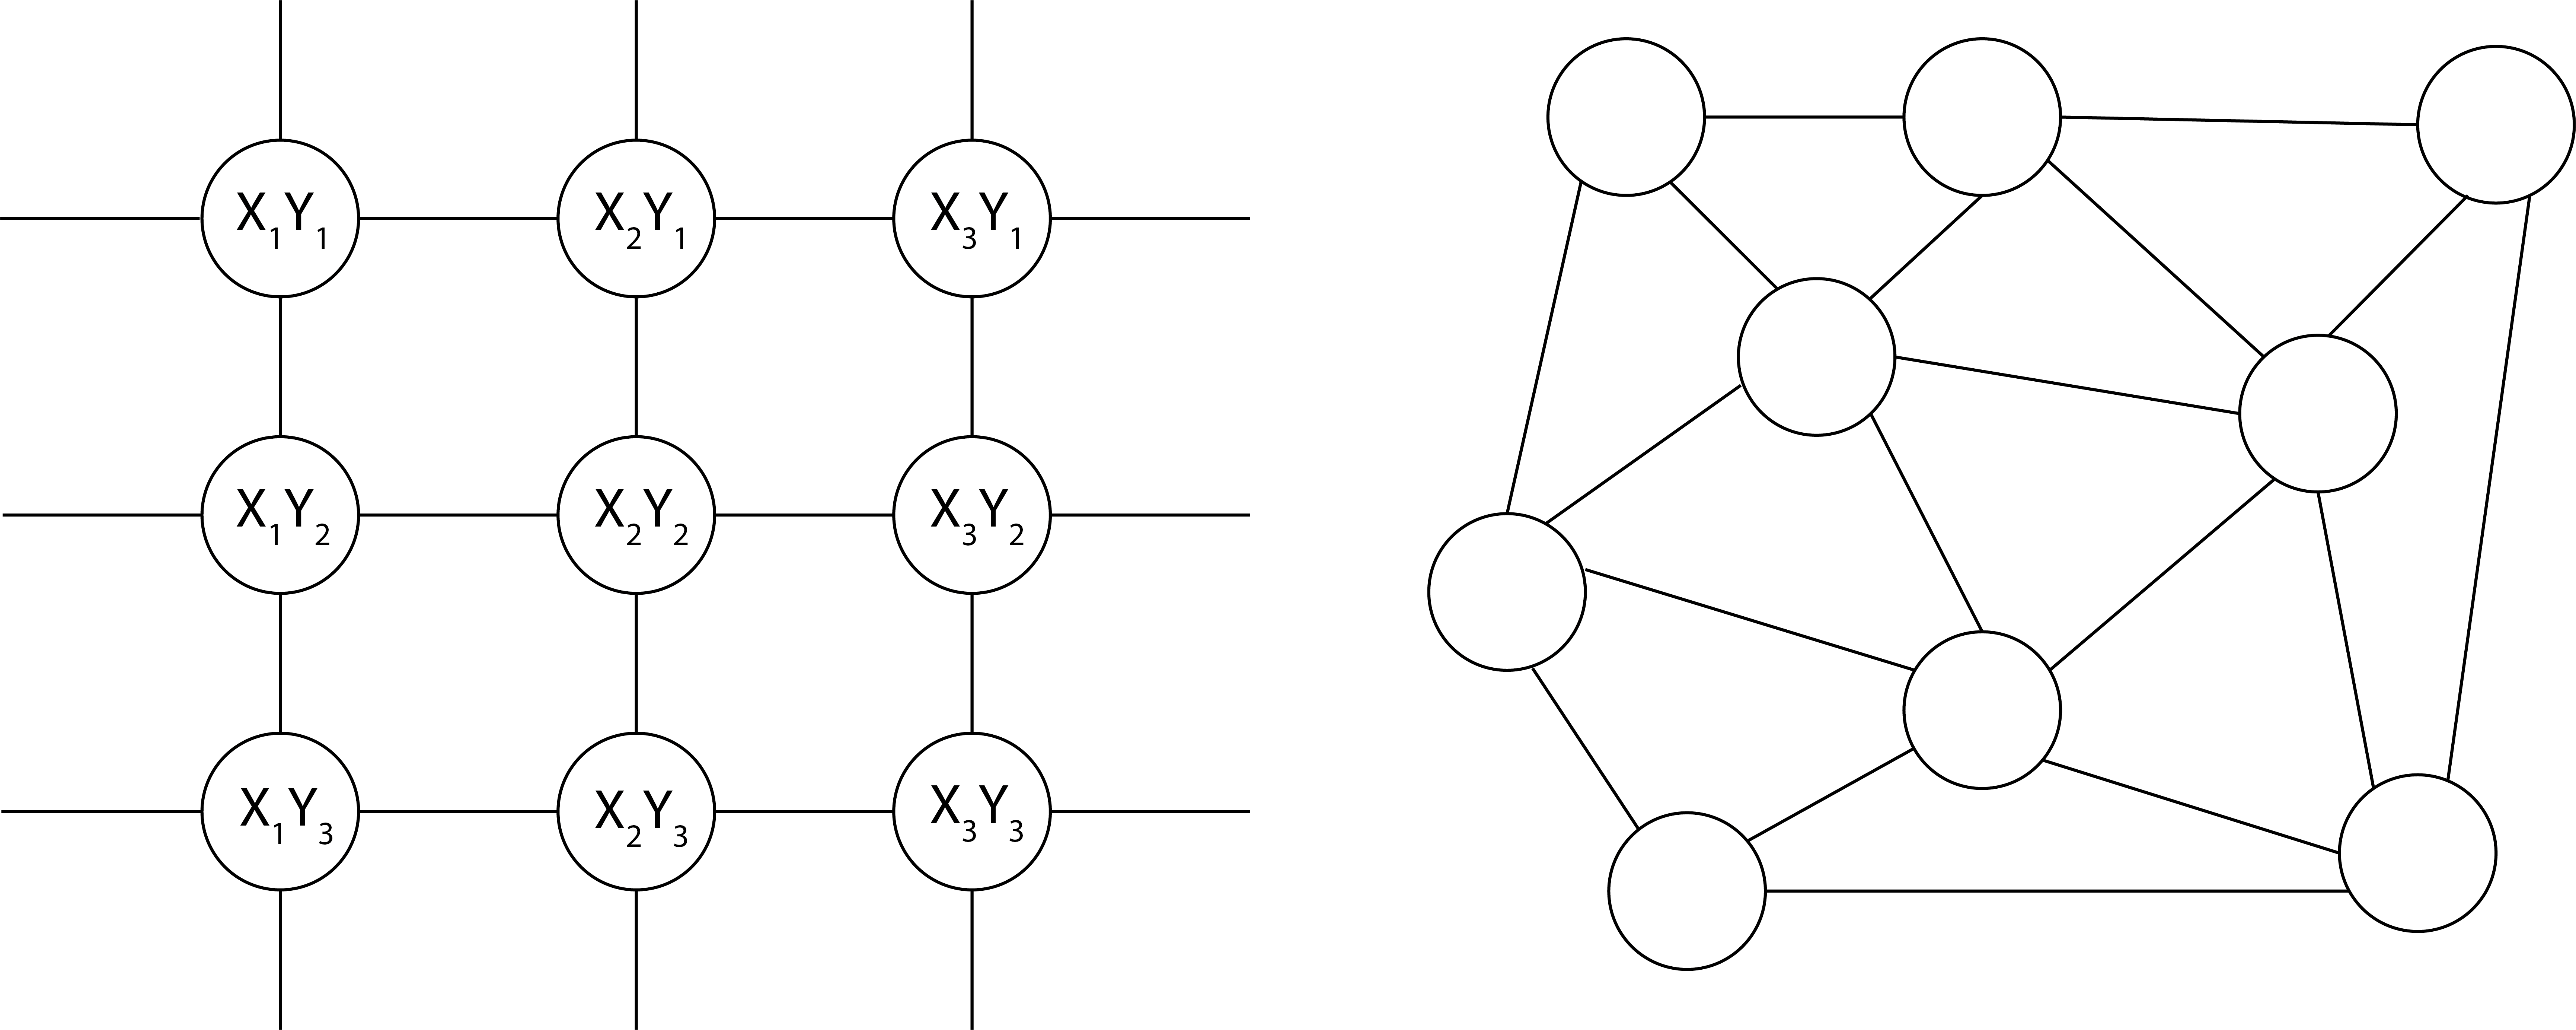
Structured output velocity file vs unstructured grids CFD velocity data input. Source:
*P.H. Gelado, "The leading edge vortex and its secondary structures: a numerical study of the flow topology of pitching and plunging airfoils", MEng Disseration, University of Glasgow, January 2021*






### Sample header from input file: 

"U:0","U:1","U:2","Q-criterion","Points:0","Points:1","Points:2"

0,0,0,-2.0633e+05,0.076136,-3.4993e-05,0.03

0,0,0,-2.9188e+07,0.0762,-3.2004e-05,0.03

0.1312,0,0,-1.7476e+05,0.076137,-4.4772e-05,0.03

0.1312,0,0,-2.494e+07,0.076207,-3.7501e-05,0.03

0,0,0,-1.7728e+05,0.076066,-3.8283e-05,0.03

0.1312,0,0,-49700,0.076066,-4.8514e-05,0.03

0.1312,0,0,-7.0466e+06,0.076207,3.7501e-05,0.03

0,0,0,-9.4372e+07,0.0762,3.2004e-05,0.03

0.1312,0,0,-0,0.076138,-5.5822e-05,0.03

In [7]:
import pandas as pd
import numpy as np 
from scipy import interpolate
from IPython.display import clear_output
import os

initialFrame = 1

finalFrame = 2

frameStep = 1


for i in range(initialFrame,finalFrame+frameStep,frameStep):
    
    #input file paths
    
    input_file = os.getcwd()
    input_file += '/InputVelocity/velocity_' #sample velocity files for you to try this out
    input_file += str(i)
    input_file += '.csv'

    #output file paths
    output_file = os.getcwd()
    output_file += '/StructuredVelocityOutput/'
    output_file += str(i)
    output_file += '.txt'

    df = pd.read_csv(input_file)
    
    df = df.drop(["U:2","Q-criterion","Points:2"], axis = 1)
    
    df = df.rename(columns = {'Points:0' : 'X', 'Points:1': 'Y', 'U:0': 'U', 'U:1':'V'})
    
    x = df['X'].to_numpy() #x input coordinates of velocity file
    y = df['Y'].to_numpy() #y input coordinates of velocity file
    u = df['U'].to_numpy() #u input coordinates of velocity file
    v = df['V'].to_numpy() #v input coordinates of velocity file

    xgrid = np.linspace(-0.05, 0.05, 100) #output grid (initial x, final x, resolution)
    ygrid = np.linspace(-0.05, 0.05, 100) #output grid (initial y, final x, resolution)
    xx, yy = np.meshgrid(xgrid, ygrid) #grid is meshed

    points = np.transpose(np.vstack((x, y))) #creating a joint (x,y) matrix
    u_interp = interpolate.griddata(points, u, (xx, yy), method='cubic') #interpolating u
    v_interp = interpolate.griddata(points, v, (xx, yy), method='cubic') #interpolating v

    x1 = pd.DataFrame (data=np.hstack(xx), columns=['X'])
    y1 = pd.DataFrame (data=np.hstack(yy), columns=['Y'])
    u1 = pd.DataFrame (data=np.hstack(u_interp), columns=['U'])
    v1 = pd.DataFrame (data= np.hstack(v_interp), columns=['V'])
    
    df = pd.concat([x1,y1,u1,v1], axis=1)
    
    #df = df.round({'X': 4, 'Y': 4})                                   
    #df.groupby(['X', 'Y']).mean()
    
    df = df.drop_duplicates(['X', 'Y'])
    #df = df.dropna()
    df = df.sort_values(by=['X', 'Y'])
    
    print('Processing ',round((i-1)/(finalFrame-initialFrame)*100,2), '%')
    clear_output(wait=True)
    
    df.to_csv(output_file, sep=' ', index = False, header = False)

Processing  100.0 %


In [8]:
df

X        Y         U         V
0    -0.05 -0.05000  0.131002 -0.000467
100  -0.05 -0.04899  0.130994 -0.000470
200  -0.05 -0.04798  0.130982 -0.000472
300  -0.05 -0.04697  0.130969 -0.000474
400  -0.05 -0.04596  0.130955 -0.000476
...    ...      ...       ...       ...
9599  0.05  0.04596  0.132366 -0.000672
9699  0.05  0.04697  0.132339 -0.000646
9799  0.05  0.04798  0.132310 -0.000621
9899  0.05  0.04899  0.132281 -0.000598
9999  0.05  0.05000  0.132251 -0.000575

[10000 rows x 4 columns]